# Data Log

- Keep track of where you made and calculated variables


In [1]:
# Import Packages

#Data Structure/Organization Packages
import pandas as pd
import xarray as xr
import numpy as np
import numpy.ma as ma

# Plotting Packages
import matplotlib.pyplot as plt
from cmocean import cm as cmo
import seaborn as sns
import matplotlib.patches as patch
from labellines import labelLine, labelLines
from matplotlib.ticker import FormatStrFormatter
import matplotlib.patheffects as pe 

# Utility Packages
import random as rand
import os
import math
# import dataframe_image as dfi
import itertools
from scipy import interpolate
from tqdm import tqdm

# Oceanography Packages
import gsw
import importlib
import geopy.distance

# Import Packages

#Data Structure/Organization Packages
import pandas as pd
import xarray as xr
import numpy as np
import numpy.ma as ma


In [2]:
# Modules
import mod_main as sg
import mod_L3proc as gproc     # for L3 grid processing
import mod_DFproc as dfproc    # for dataframe processing
import mod_plot as sgplot  
import mod_RFR as rfr
import mod_MLV as mlv

from mod_plot import my_params
from importlib import reload

plt.rcParams.update(my_params(16))

# Get data
from mod_main import df_659, df_660, dav_659, dav_660
from mod_main import sgfloat, dav_6030, dav_float
# from mod_RFR import RF_validation, RF_test, RF_modelmetrics, RF_featimps
# from mod_RFR import RF_kfold, RF_loo

from mod_MLV import mlstat_659, mlstat_660, mlstat_float
from mod_MLV import hvariance_659, hvariance_660
from mod_main import floatDF
wmoids = floatDF.wmoid.unique()


In [6]:
floatDF.describe()

,yearday,lat,lon,pressure,CT,SA,oxygen,sigma0,log_buoyancy,spice,o2sat,mncos,mnsin,month,nitrate,wmoid,profid,dist_maxb
count,17644.000000,17644.000000,17644.000000,17644.000000,17644.000000,17644.000000,17644.000000,17644.000000,17644.000000,17644.000000,17644.000000,1.764400e+04,1.764400e+04,17644.000000,17644.000000,1.764400e+04,1.764400e+04,17644.000000
mean,261.387147,-53.291824,40.735773,302.109762,1.914370,34.395861,250.484252,27.361793,-12.408210,-0.390839,333.413492,-9.212918e-02,2.448272e-02,6.317955,31.382708,5.905703e+06,5.905703e+09,-156.890386
std,376.483538,2.375560,16.990384,254.072176,0.787082,0.294478,64.690164,0.241948,1.637847,0.217146,6.748141,7.088077e-01,6.989711e-01,3.274049,3.411854,5.913006e+02,5.912780e+05,258.518503
min,-603.853947,-58.682000,5.300000,4.250000,-1.818182,33.861920,163.400510,26.719520,-21.980751,-0.949835,309.617113,-1.000000e+00,-1.000000e+00,1.000000,22.101385,5.904469e+06,5.904469e+09,-988.010000
25%,21.056042,-54.963000,31.563000,101.857501,1.525121,34.108749,184.607028,27.179233,-13.014580,-0.588256,329.768549,-8.660254e-01,-5.000000e-01,4.000000,28.478008,5.905368e+06,5.905368e+09,-250.000000
50%,296.140347,-52.863000,40.406000,239.495005,2.019862,34.376257,237.018250,27.357906,-12.030194,-0.412367,332.048424,-1.836970e-16,1.224647e-16,6.000000,32.219065,5.906030e+06,5.906030e+09,-90.000000
75%,565.527002,-51.304000,57.350000,381.460000,2.268750,34.659575,321.293498,27.564177,-11.383183,-0.195353,336.740493,5.000000e-01,5.000000e-01,9.000000,34.495955,5.906031e+06,5.906031e+09,30.510000
max,922.671736,-49.263000,64.896000,999.990000,5.074960,34.923669,360.653050,27.823765,-8.443500,-0.003233,367.842194,1.000000e+00,1.000000e+00,12.000000,36.472710,5.906207e+06,5.906207e+09,325.670000


In [4]:
# Methods
def print_bounds(DF):
    # print('Bounds of data: \n')
    print('Dates: \t\t' + str(sg.ytd2datetime(DF.yearday.min())) + ' to ' + str(sg.ytd2datetime(DF.yearday.max())))
    print('Latitude:\t' + str(DF.lat.min()) + ' to ' + str(DF.lat.max()))
    print('Longitude:\t' + str(DF.lon.min()) + ' to ' + str(DF.lon.max()))

print_bounds(floatDF)

Dates: 		2017-05-08 to 2021-07-11
Latitude:	-58.682 to -49.263
Longitude:	5.3 to 64.896


In [5]:
wmoids

array([5904469, 5904659, 5905368, 5905996, 5906030, 5906031, 5906207])

In [ ]:
# ## making some dav's
# for ind, profnum in enumerate(mlstat_660.profid.values):
#     if profnum in baseML_stat660.profid.values:
#         mlstat_660.at[ind, 'log_buoyancy'] = baseML_stat660[baseML_stat660.profid==profnum].log_buoyancy.values[0]
#         # mlstat_660.at[ind, 'grad_nitrate'] = baseML_stat660[baseML_stat660.profid==profnum].grad_nitrate.values[0]
#     if profnum in bx100_660.profid.values:
#         mlstat_660.at[ind, 'Bx'] = bx100_660[bx100_660.profid==profnum].Bx.values[0]

# for ind, profnum in enumerate(mlstat_659.profid.values):
#     if profnum in baseML_stat659.profid.values:
#         mlstat_659.at[ind, 'log_buoyancy'] = baseML_stat659[baseML_stat659.profid==profnum].log_buoyancy.values[0]
#         # mlstat_659.at[ind, 'grad_nitrate'] = baseML_stat659[baseML_stat659.profid==profnum].grad_nitrate.values[0]
#     if profnum in bx100_659.profid.values:
#         mlstat_659.at[ind, 'Bx'] = bx100_659[bx100_659.profid==profnum].Bx.values[0]
        
# dir = '../working-vars/ML-variability/'
# mlstat_659.to_csv(dir + 'mixedlayerstat_659_may24.csv')
# mlstat_660.to_csv(dir + 'mixedlayerstat_660_may24.csv')

# mldf_659.to_csv(dir + 'mldf_659_may24.csv')
# mldf_660.to_csv(dir + 'mldf_660_may24.csv')
# dav_6030 =pd.read_csv('../data/bgc-argo/dav_full6030_noqc.csv')   

# modis = xr.open_dataset('../data/satellite/Aqua.L3m_8D_2019_par_4km.nc')
# modis['days'] = sg.datetime2ytd(modis.time)

# def get_closest_par(row):
#     lat = row.lat
#     lon = row.lon
#     time = sg.ytd2datetime(row.yearday)

#     row['par'] = modis.sel(time=time, lat=lat, lon=lon, method='nearest').par.values
#     return row

# # Trim MODIS to speed up method
# lat1 = -57
# lat2 = -48
# lon1 = 10
# lon2 = 70

# modis = modis.sel(lat=slice(lat1, lat2))
# modis = modis.sel(lon=slice(lon1, lon2))
# modis = modis.sel(time=slice('2019-04-15', '2019-08-05'))

# dav_6030['par'] = np.tile(np.nan, dav_6030.shape[0])
# dav_6030 = dav_6030.apply(get_closest_par, axis='columns')
# dav_6030.profid = dav_6030.profid.astype(int)


# pd.read_csv('../data/bgc-argo/dav_sgfloat_EKE.csv')  
# dav_float[['profid', 'yearday', 'lat', 'lon', 'mld', 'eke', 'par']].to_csv('../data/bgc-argo/dav_sgfloat_EKEPAR.csv')
# pd.read_csv('../data/glider/dav_659_EKE.csv')  

# dav_659 = pd.read_csv('../data/glider/dav_659_EKE.csv')  
# dav_660 = pd.read_csv('../data/glider/dav_660_EKE.csv')
# # Add PAR
# def get_closest_par(row):
#     lat = row.lat
#     lon = row.lon
#     time = sg.ytd2datetime(row.yearday)

#     row['par'] = modis.sel(time=time, lat=lat, lon=lon, method='nearest').par.values
#     return row

# dav_660['par'] = np.tile(np.nan, dav_660.shape[0])
# dav_659['par'] = np.tile(np.nan, dav_659.shape[0])


# dav_659 = dav_659.apply(get_closest_par, axis='columns')
# dav_660 = dav_660.apply(get_closest_par, axis='columns')

# dav_660.profid = dav_660.profid.astype(int)  # apply function will cast into float
# dav_659.profid = dav_659.profid.astype(int)


# dav_659.to_csv('../data/glider/dav_659_EKEPAR.csv')  
# dav_660.to_csv('../data/glider/dav_660_EKEPAR.csv')


# dav_float
# from mod_plot import *
# fig = plt.figure(figsize=(10,6))
# ax = fig.gca()
# ax.scatter(mlstat_659.yearday, mlstat_659.mld, s=10, alpha=0.8, label='SG659', color=plat_colors['sg659'], zorder=3)
# ax.scatter(mlstat_660.yearday, mlstat_660.mld, s=10, alpha=0.8, label='SG660',color=plat_colors['sg660'], zorder=3)
# ax.scatter(dav_6030.yearday, dav_6030.mld, label='Float',  marker='D', edgecolors='k', linewidth=2.1,
#                 s=10, alpha=0.8, color='#CCBB44', zorder=3)

# ax.legend(markerscale=3, ncol=3)
# # reload(sg)
# reload(sgplot)
# fsize = (7,11)
# # fsize = 13,26
# sgplot.plt_time_series(fsize = fsize, dotsize=8, diasize=50, titlesize=16, dateformat=True,
#                        legend=False)
# from mod_plot import plat_colors
# reload(sgplot)
# from mod_plot import *

In [ ]:
# reload(dfproc)
# bx100_660 = dfproc.get_depth_bx(df_660, d0=100, thresh=5)
# bx100_659 = dfproc.get_depth_bx(df_659, d0=100, thresh=5)
# mldf_659 = dfproc.make_mldf(df_659, dav_659)
# mldf_660 = dfproc.make_mldf(df_660, dav_660)
# mldf_float = dfproc.make_mldf(sgfloat, dav_float)
# baseML_stat659 = mlv.get_baseML_stat(mldf_659, dav_659)
# baseML_stat660 = mlv.get_baseML_stat(mldf_660, dav_660)
# baseML_float = mlv.get_baseML_stat(mldf_float, dav_float)

# Float selection 

## trying to replicate, jun 17. 


In [ ]:
# Get all floats from chosen period
lat_bounds = [-65,-45]  # used to be -70 to -30
lon_bounds = [5,65]    # used to be 10, 60

# Try using more time buffer, 2 years. 
start_yd = datetime(2017,4,20) # datetime(2019,4,30)  # yd 120
end_yd = datetime(2021,7,30) # datetime(2019,7,19)  # yd 200

# download
wmoids, gdac_index, downloaded_filenames = argo_gdac(lat_range=lat_bounds,lon_range=lon_bounds,
                               start_date=start_yd,end_date=end_yd,
                               sensors=None,floats=None,
                               overwrite_index=True,overwrite_profiles=True,  # over profiles change to true
                               skip_download=False,download_individual_profs=False,  
                               save_to=profile_dir,verbose=True)

# Create Float dictionary 
wmoids=np.sort(wmoids)
DSdict = {}
for filename in os.listdir(profile_dir):
    if filename.endswith(".nc"):
        fp = profile_dir + filename
        single_dataset = xr.open_dataset(fp, decode_times=False)
        DSdict[filename[0:7]] = single_dataset
# DSdict['5906030']
wmoids



In [ ]:
# Set up variables to store
dvars = ['wmoid','profid','yearday','lat','lon','pressure','CT', 'SA','oxygen','nitrate', 'temperature','salinity', 'sigma0', 'spice'] #, 'bbp700','pH']
qcvars = ['juld_qc', 'position_qc', 'pressure_qc', 'temperature_qc', 'salinity_qc', 'oxygen_qc', 'nitrate_qc'] #, 'pH_qc','bbp700_qc']

In [ ]:

dvars = ['wmoid','profid','yearday','lat','lon','pressure','CT', 'SA','oxygen','nitrate', 'temperature','salinity', 'sigma0', 'spice'] #, 'bbp700','pH']
qcvars = ['juld_qc', 'position_qc', 'pressure_qc', 'temperature_qc', 'salinity_qc', 'oxygen_qc', 'nitrate_qc'] #, 'pH_qc','bbp700_qc']

def make_float_df(wmo, floatDSdict):
        """
        Return dataframe from a single float dataset
        @param:
                wmo (int)
                floatDSdict (dict): dictionary of float datasets
        """
        temp = floatDSdict[str(wmo)]
        float_df = temp[['JULD','LATITUDE', 'LONGITUDE','PRES_ADJUSTED','TEMP_ADJUSTED','PSAL_ADJUSTED',
                         'DOXY_ADJUSTED','NITRATE_ADJUSTED', # , 'PH_IN_SITU_TOTAL_ADJUSTED','BBP700_ADJUSTED', 
                        'JULD_QC', 'POSITION_QC', 'PRES_ADJUSTED_QC', 'TEMP_ADJUSTED_QC','PSAL_ADJUSTED_QC', 
                        'DOXY_ADJUSTED_QC', 'NITRATE_ADJUSTED_QC']].to_dataframe() #'BBP700_ADJUSTED_QC' #, 'PH_IN_SITU_TOTAL_ADJUSTED_QC',
        dtimes = pd.to_datetime(float_df.JULD.values, unit='D', origin=pd.Timestamp('1950-01-01'))
        float_df['yearday'] = sg.datetime2ytd(dtimes)
        float_df['wmoid'] = np.repeat(wmo, len(float_df))


        # need to get the profile number from the index
        # create a 10-digit unique id so easy to sort later
        prof = float_df.index.get_level_values(0)
        prof = prof.astype(str); prof = [tag.zfill(3) for tag in prof]
        float_df['profid'] = [str(wmo)+tag for tag in prof]


        qc_keys = ['JULD_QC', 'POSITION_QC', 'PRES_ADJUSTED_QC', 'TEMP_ADJUSTED_QC', 'PSAL_ADJUSTED_QC',
            'DOXY_ADJUSTED_QC', 'NITRATE_ADJUSTED_QC'] #, 'PH_IN_SITU_TOTAL_ADJUSTED_QC', 'BBP700_ADJUSTED_QC']
        for key in qc_keys:  #qc flags are not stored as ints so we can convert
                newlist = []
                for qc in float_df[key]:
                        if str(qc)[2] == 'n': newlist.append('NaN')
                        else: newlist.append(str(qc)[2])
                float_df[key] = newlist
        
        float_df.rename(columns={'LATITUDE':'lat','LONGITUDE':'lon',
                        'PRES_ADJUSTED': 'pressure', 'TEMP_ADJUSTED': 'temperature', 'PSAL_ADJUSTED': 'salinity',
                        'DOXY_ADJUSTED': 'oxygen', 'NITRATE_ADJUSTED':'nitrate'}, inplace=True)
                        # 'PH_IN_SITU_TOTAL_ADJUSTED': 'pH', 'BBP700_ADJUSTED': 'bbp700'
        float_df.rename(columns={'JULD_QC': 'juld_qc', 'POSITION_QC': 'position_qc', 
                        'PRES_ADJUSTED_QC': 'pressure_qc', 'TEMP_ADJUSTED_QC': 'temperature_qc','PSAL_ADJUSTED_QC': 'salinity_qc',
                        'DOXY_ADJUSTED_QC': 'oxygen_qc', 'NITRATE_ADJUSTED_QC': 'nitrate_qc'}, inplace=True) 
                        # 'PH_IN_SITU_TOTAL_ADJUSTED_QC': 'pH_qc','BBP700_ADJUSTED_QC': 'bbp700_qc'

        float_df['CT'] = gsw.CT_from_t(float_df['salinity'], float_df['temperature'], float_df['pressure'])
        float_df['SA']= gsw.SA_from_SP(float_df['salinity'],float_df['pressure'],float_df['lon'],float_df['lat'])

        # # Add training variables Sigma0 and Spice as desired
        float_df['sigma0'] = gsw.sigma0(float_df.SA.values, float_df.CT.values)
        float_df['spice'] = gsw.spiciness0(float_df["SA"].values, float_df["CT"].values)

        # Add oxygen saturation and drho/dz
        float_df = float_df[dvars + qcvars]

        return float_df


In [ ]:
# Create float dictionary with valid nitrate data
DFdict = {}
for wmo in wmoids:
    try: 
        float_df = make_float_df(wmo, DSdict)
        print(str(wmo) + ' added to dataframe dictionary')
    except:
        print(str(wmo) + ' missing data fields')
    else: DFdict[str(wmo)] = float_df

# Create combined floats dataframe
argo_df = pd.DataFrame()
for DF in DFdict:
    argo_df = pd.concat([argo_df, DFdict[DF]])

## QC 

In [ ]:
# Initial Range Drop
argo_data = argo_df.copy()

# Adjust data to bounds
argo_data = argo_data[argo_data['pressure'] <1000]
argo_data = argo_data[(argo_data['lat'] > -60) & (argo_data['lat'] < -45)]
argo_data = argo_data[(argo_data['lon'] > 5) & (argo_data['lon'] < 65)]

# cut off dates to two year before and after deployment
argo_data = argo_data[(argo_data['yearday'] > (120-365*2)) & (argo_data['yearday'] < (200+365*2))]
argo_data.describe()

In [ ]:
# Additional variable QC drop
argo_qc = argo_data.copy()
print(str(len(argo_qc)) + ' obs before QC')
X = len(argo_qc)

for var in [x for x in qcvars if x != "pH_qc"]:
    argo_qc = argo_qc[(argo_qc[var] == '1') | (argo_qc[var] == '2')| (argo_qc[var] == '8')]
    #qc flag meanings           1: good data, 2: probably good data, 8: interpolated value
    
    print('after ' + var)
    print('\t' + str(len(argo_qc)) + ' obs left   ' + ' \t' +str(X-len(argo_qc)) + ' dropped'); 
    X = len(argo_qc)

print('Note no QC drop on pH to preserve nitrate data from SOGOS float')
print('Keep pH as a field for now, but will not use')

argo_qc.describe()

In [ ]:
# Methods
def print_bounds(DF):
    # print('Bounds of data: \n')
    print('Dates: \t\t' + str(sg.ytd2datetime(DF.yearday.min())) + ' to ' + str(sg.ytd2datetime(DF.yearday.max())))
    print('Latitude:\t' + str(DF.lat.min()) + ' to ' + str(DF.lat.max()))
    print('Longitude:\t' + str(DF.lon.min()) + ' to ' + str(DF.lon.max()))


def restrict_DF(data, start_yd, end_yd, lat1, lat2, lon1, lon2):
    data = data[(data.lat > lat1) & (data.lat < lat2)]
    data = data[(data.lon > lon1 ) & (data.lon <lon2)]
    data = data[(data.yearday > start_yd) & (data.yearday < end_yd)]
    return data


In [ ]:
# Restrict to fronts
PF = pd.read_csv('../data/ACC_fronts/PF.csv', header=None)
SIF = pd.read_csv('../data/ACC_fronts/SIF.csv', header=None)
for csv in [PF, SIF]:
    csv.columns = ['lon', 'lat']
argo_qc = dfproc.between_fronts(argo_qc, PF, SIF, buffers=[0.5,0.5])

print_bounds(argo_qc)
wmoids = argo_qc.wmoid.unique()
print('Number of floats within bounds: ' + str(len(argo_qc.wmoid.unique())))
argo_qc.value_counts('wmoid')

In [ ]:

# Remove any floats that have fewer than 100 obs
newdf = pd.DataFrame()
for wmo in wmoids: 
    flo = argo_qc[argo_qc.wmoid==wmo]
    if len(flo)>100:
        newdf = pd.concat([newdf, flo])
    else:
        print('wmo ' + str(wmo) + ' removed.')
argo_qc = newdf.copy()



### add training variables

In [ ]:
# Add buoyancy to each profile
argo_qc = dfproc.add_Pchip_buoyancy(argo_qc) 
argo_qc['log_buoyancy'] = np.log(argo_qc['buoyancy'])

# Add oxygen metrics, oxygen saturation, 
argo_qc['AOU'] = gsw.O2sol(argo_qc['SA'], argo_qc['CT'], argo_qc['pressure'], argo_qc['lon'], argo_qc['lat']) - argo_qc['oxygen']
argo_qc['o2sat'] = gsw.O2sol(argo_qc['SA'], argo_qc['CT'], argo_qc['pressure'], argo_qc['lon'], argo_qc['lat'])


In [ ]:
# rop
wmoids = pd.unique(argo_qc['wmoid'])  # 12 with good nitrate
# qcdrop = [x for x in wmo_list if x not in wmo_qc]


# floats that did not pass QC
# print(qcdrop) 

# Remove any floats that have fewer than 200 obs
newdf = pd.DataFrame()
for wmo in wmoids: 
    flo = argo_qc[argo_qc.wmoid==wmo]
    if len(flo)>200:
        newdf = pd.concat([newdf, flo])
argo_qc = newdf.copy()


print(); print('WMO    ' + '\t # obs')
print(argo_qc.wmoid.value_counts())

### choose floats that were screened during high temp

In [ ]:
valid_wmoids = [5904469, 5904659, 5905368, 5905996, 5906030, 5906031, 5906207]
argo_temp = argo_qc[argo_qc.wmoid.isin(valid_wmoids)]
len(argo_temp)

17

In [ ]:
def add_yd_sinusoids(DF):
    DF['ydcos'] = [sg.get_ydsines(x)[0] for x in DF.yearday.values]
    DF['ydsin'] = [sg.get_ydsines(x)[1] for x in DF.yearday.values]
    return DF
argo_temp = add_yd_sinusoids(argo_temp)
# shipDF = add_yd_sinusoids(argo_temp)

# Choose final features to be tested
tvars = ['yearday','lat','lon','pressure','CT', 'SA','oxygen', 'sigma0', 'log_buoyancy', 
         'spice','o2sat', 'ydcos', 'ydsin']
pvars = ['nitrate']  # prediction variable

# Take variables of interest
argo_temp = argo_temp[tvars + pvars + ['wmoid', 'profid']].dropna()
# shipDF = shipDF[tvars + pvars + ['profid', 'dist_maxb']].dropna() # dont drop on wmoid yet

# Reset wmoids
wmoids = argo_temp.wmoid.unique()

# print('# Ship observations (without NaNs): \t', shipDF.shape[0])
print('# Float observations (without NaNs ): \t', argo_temp.shape[0])
print('# 5906030 observations (without NaNs): \t', argo_temp[argo_temp.wmoid==5906030].shape[0])

In [ ]:
argo_temp.value_counts('wmoid')

In [ ]:
from mod_plot import wmo_colors
fig = plt.figure(figsize=(12,3))
ax=plt.gca()

for wmo in wmoids[wmoids!=5906030]:
    ax.plot(argo_temp[argo_temp.wmoid==wmo].lon,argo_temp[argo_temp.wmoid==wmo].lat,
            color = wmo_colors[wmo], alpha=0.2, linewidth=1, label=str(wmo)[3:], zorder=3)
    ax.scatter(argo_temp[argo_temp.wmoid==wmo].lon,argo_temp[argo_temp.wmoid==wmo].lat,
            color = wmo_colors[wmo], alpha=0.1, s=20, zorder=3)

for wmo in [5906030]:
    ax.plot(argo_temp[argo_temp.wmoid==wmo].lon,argo_temp[argo_temp.wmoid==wmo].lat,
            color = wmo_colors[wmo], alpha=0.4, linewidth=7, label=str(wmo)[3:], zorder=3)
    ax.scatter(argo_temp[argo_temp.wmoid==wmo].lon,argo_temp[argo_temp.wmoid==wmo].lat,
            color = wmo_colors[wmo], alpha=0.1, s=30, zorder=3)

for front in [SIF, PF]:
     front = front[(front.lon > 0 ) & (front.lon <65)]
     ax.scatter(front.lon, front.lat, color='k', alpha=0.2, s=4, zorder=3)
#      ax.plot(front.lon, front.lat, color='k', alpha=0.1, linewidth=2, zorder=3)

# plt.title('BGC-Argo Training Data')
# plt.title('Argo Yeardays: ' + str(start_yd) + ' to ' + str(end_yd))
rect = patch.Rectangle((30,-54),10,4, fill=True, color="orange", alpha=0.3,linewidth=2, zorder=1)

ax.set_xlim(1,69)
ax.set_ylim(-62,-47)
ax.set_aspect('equal')

# ax.legend()
ax.add_patch(rect)
# ax.set_xlim(5,81)
# ax.set_ylim(-60,-30)
# ax.set_aspect('equal')

ax.yaxis.set_major_formatter("{x:1.0f}°S")
ax.xaxis.set_major_formatter("{x:1.0f}°E")

ax.grid(linestyle='dashed', alpha=0.6, zorder=1)

lines = ax.get_lines()
labelLines(lines, align=False, fontsize=18, zorder=3)
# labelLines(lins) # , align=False, fontsize=18)
# plt.plot(shipDF.lon, shipDF.lat, alpha=0.8, linestyle='dashed', c='k', linewidth=5)

---

In [8]:
print_bounds(floatDF)

Dates: 		2017-05-08 to 2021-07-11
Latitude:	-58.682 to -49.263
Longitude:	5.3 to 64.896


In [13]:
# floatDF.value_counts('wmoid')
floatDF.columns

Index(['yearday', 'lat', 'lon', 'pressure', 'CT', 'SA', 'oxygen', 'sigma0',
       'log_buoyancy', 'spice', 'o2sat', 'mncos', 'mnsin', 'month', 'nitrate',
       'wmoid', 'profid', 'dist_maxb'],
      dtype='object')

In [ ]:
# Restrict the data to Antarctic Southern Zone (ASZ) region
argo_qc = dfproc.between_fronts(floatDF, PF, SIF, buffers=[0.5,0.5])
ship_qc = dfproc.between_fronts(shipDF, PF, SIF, buffers=[0.5,0.5])

# Restrict by time
start_yd = sg.datetime2ytd(np.datetime64('2017-04-20')) # datetime(2019,4,30)  # yd 120
end_yd = sg.datetime2ytd(np.datetime64('2021-07-30')) # datetime(2019,7,19)  # yd 200

# Remove some points that appear to roam outsize the ASZ
lat1 = -65; lat2 = -45
lon1 = 5; lon2 = 65
argo_qc = dfproc.restrict_DF(argo_qc, start_yd, end_yd, lat1, lat2, lon1, lon2)
ship_qc = dfproc.restrict_DF(ship_qc, start_yd, end_yd, lat1, lat2, lon1, lon2)

dfproc.print_bounds(argo_qc)
wmoids = argo_qc.wmoid.unique()
print('Number of floats within bounds: ' + str(len(argo_qc.wmoid.unique())))
argo_qc.value_counts('wmoid')

NameError: name 'PF' is not defined

In [ ]:
# Remove any floats that have fewer than 100 obs
newdf = pd.DataFrame()
for wmo in wmoids: 
    flo = argo_qc[argo_qc.wmoid==wmo]
    if len(flo)>100:
        newdf = pd.concat([newdf, flo])
    else:
        print('wmo ' + str(wmo) + ' removed.')
argo_qc = newdf.copy()

wmoids = argo_qc.wmoid.unique()
print('Number of floats within bounds: ' + str(len(argo_qc.wmoid.unique())))
# argo_qc.value_counts('wmoid')
print(argo_qc.wmoid.unique())

Number of floats within bounds: 7
[5904469 5904659 5905368 5905996 5906030 5906031 5906207]


/opt/homebrew/Caskroom/mambaforge/base/envs/mlsogos/lib/python3.8/site-packages/labellines/core.py:204: UserWarning: The value at position 0 in `xvals` is outside the range of its associated line (xmin=28.246, xmax=33.568, xval=27.35). Clipping it into the allowed range.
  warnings.warn(
/opt/homebrew/Caskroom/mambaforge/base/envs/mlsogos/lib/python3.8/site-packages/labellines/core.py:204: UserWarning: The value at position 5 in `xvals` is outside the range of its associated line (xmin=56.495, xmax=64.896, xval=50.3). Clipping it into the allowed range.
  warnings.warn(


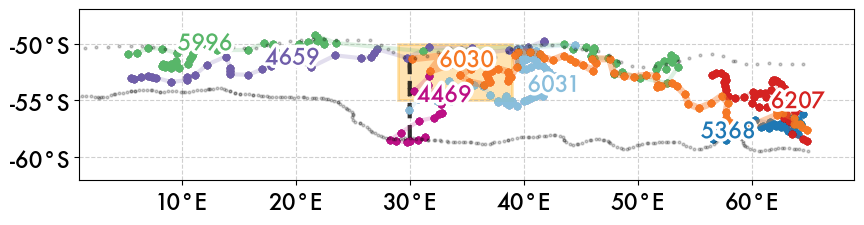

In [ ]:
# Single plot for argo map
fig = plt.figure(figsize=(10,8))
ax=plt.gca()

for wmo in wmoids[wmoids!=5906030]:
    ax.plot(floatDF[floatDF.wmoid==wmo].lon,floatDF[floatDF.wmoid==wmo].lat,
            color = wmo_colors[wmo], alpha=0.2, linewidth=3, label=str(wmo)[3:], zorder=3)
    ax.scatter(floatDF[floatDF.wmoid==wmo].lon,floatDF[floatDF.wmoid==wmo].lat,
            color = wmo_colors[wmo], alpha=0.1, s=20, zorder=3)

for wmo in [5906030]:
    ax.plot(floatDF[floatDF.wmoid==wmo].lon,floatDF[floatDF.wmoid==wmo].lat,
            color = sns.color_palette("Oranges")[3], alpha=0.4, linewidth=5, label=str(wmo)[3:], zorder=3)
    ax.scatter(floatDF[floatDF.wmoid==wmo].lon,floatDF[floatDF.wmoid==wmo].lat,
            color = sns.color_palette("Oranges")[3], alpha=0.1, s=20, zorder=3)

for front in [SIF, PF]:
     front = front[(front.lon > 0 ) & (front.lon <65)]
     ax.scatter(front.lon, front.lat, color='k', alpha=0.2, s=4, zorder=3)
#      ax.plot(front.lon, front.lat, color='k', alpha=0.1, linewidth=2, zorder=3)

# plt.title('BGC-Argo Training Data')
# plt.title('Argo Yeardays: ' + str(start_yd) + ' to ' + str(end_yd))
rect = patch.Rectangle((29,-55),10,5, fill=True, color="orange", alpha=0.3,linewidth=2, zorder=1)

ax.add_patch(rect)
ax.set_xlim(1,69)
ax.set_ylim(-62,-47)
ax.set_aspect('equal')

ax.yaxis.set_major_formatter("{x:1.0f}°S")
ax.xaxis.set_major_formatter("{x:1.0f}°E")

ax.grid(linestyle='dashed', alpha=0.6, zorder=1)

lines = ax.get_lines()
labelLines(lines, align=False, fontsize=16, zorder=3)
# labelLines(lins) # , align=False, fontsize=18)
ax.plot(shipDF.lon, shipDF.lat, alpha=0.8, linestyle='dashed', c='k', linewidth=3)

# if save:
#         plt.savefig('../figures/Argo_simple_region_map.png', dpi=300)

In [ ]:
# shipDF.to_csv('../data/go-ship/mldata_shipDF_qc.csv', index=False)
# argo_qc.to_csv('../data/bgc-argo/mldata_floatDF_qc.csv', index=False)

In [ ]:

# daylist = np.arange(120,201,1)
# # daylist = np.arange(140,143,1)
# for day in daylist:
#     fig = plt.figure(figsize=(14,8))
#     adt_sogos.adt.attrs={'long_name':'ADT'}
#     dat = adt_sogos.sel(time=sg.ytd2datetime(day))
#     map = dat.adt.plot(cmap=cmo.ice_r, vmin=-1.2, vmax=-.15, zorder=1)

#     # ticklist = np.arange(-1.2, -.2, .02)
#     # cax = fig.add_axes([ax.get_position().x1+0.04,ax.get_position().y0,0.03,ax.get_position().height])
#     # cbar = plt.colorbar(map, ax=cax, ticks=ticklist)
#     # cbar.set_label('ADT (m)')

#     plt.title('Yearday ' + str(day))
#     # plt.title('')

#     # Plot glider paths
#     plt.plot(diveave_659.lon, diveave_659.lat, linewidth=9, color=hue659, alpha=0.7)
#     plt.plot(diveave_660.lon, diveave_660.lat, linewidth=12, color=hue660, alpha=0.5)

#     ax=fig.gca()
#     ax.set_ylim([-55.7, -47.7])
#     ax.set_xlim([29.1, 39.1])
#     # ax.set_aspect('equal')
#     ax.yaxis.set_major_formatter("{x:1.0f}°S")
#     ax.xaxis.set_major_formatter("{x:1.0f}°E")

#     # Plot points of glider on that day
#     i = np.where(diveave_659.days.round()==day)
#     plt.scatter(diveave_659.lon.iloc[i], diveave_659.lat.iloc[i], 400, color=hue659, label = '659', zorder=3, alpha=1, edgecolors='k') # marker='o', markeredgecolor='k')
#     i = np.where(diveave_660.days.round()==day)
#     plt.scatter(diveave_660.lon.iloc[i], diveave_660.lat.iloc[i], 400, color=hue660, label = '660', zorder=3, alpha=1, edgecolors='k')


#     # Plot nearest argo float location
#     dayfloat = sgfloat[sgfloat.yearday==(day // 5) * 5]  # use floor function to round day to nearest 5 day, to match argo
#     plt.scatter(dayfloat.lon, dayfloat.lat, s=800, color='yellow', alpha=1, marker='D', edgecolors='k', label='argo', zorder=3)

#     plt.ylabel('')
#     plt.xlabel('')
#     # plt.legend(facecolor='white', labelcolor='white', framealpha=0.2)


#     plt.tight_layout()
#     if savefig:
#         plt.savefig(file_path + fname + str(day) + '.png', format='png')
#         # print('saved')
#         plt.close()

### 1.1.1 Checking Training Data Distributions

- We do quick screening to make sure the training data are representative. 

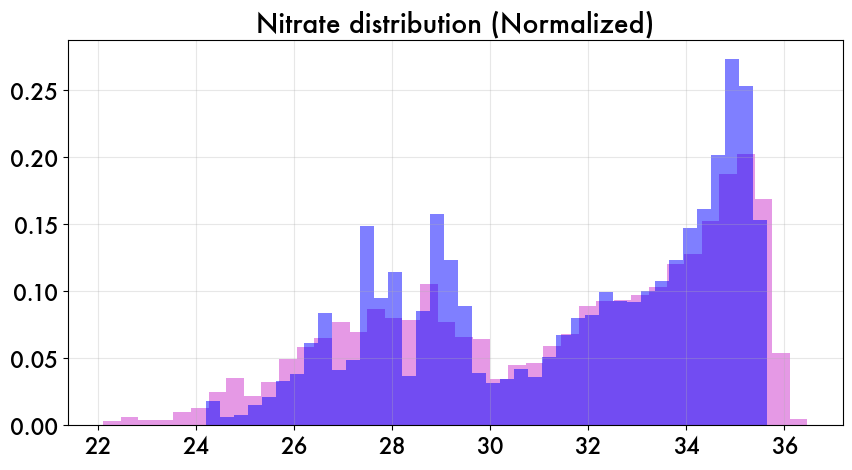

In [ ]:
# Compare distributions between float and gliders
threshold = 1000
dfloat = floatDF[floatDF.pressure<threshold]

fig = plt.figure(figsize=(10,5))
plt.hist(dfloat.nitrate, bins=40, color='m', alpha=0.4, label="float", density=True)
plt.hist(dfloat[dfloat.wmoid == 5906030].nitrate, bins=40, color='b', alpha=0.5, label="float 6030", density=True)
plt.title('Nitrate distribution (Normalized)')
plt.grid(alpha=0.3, zorder=1)


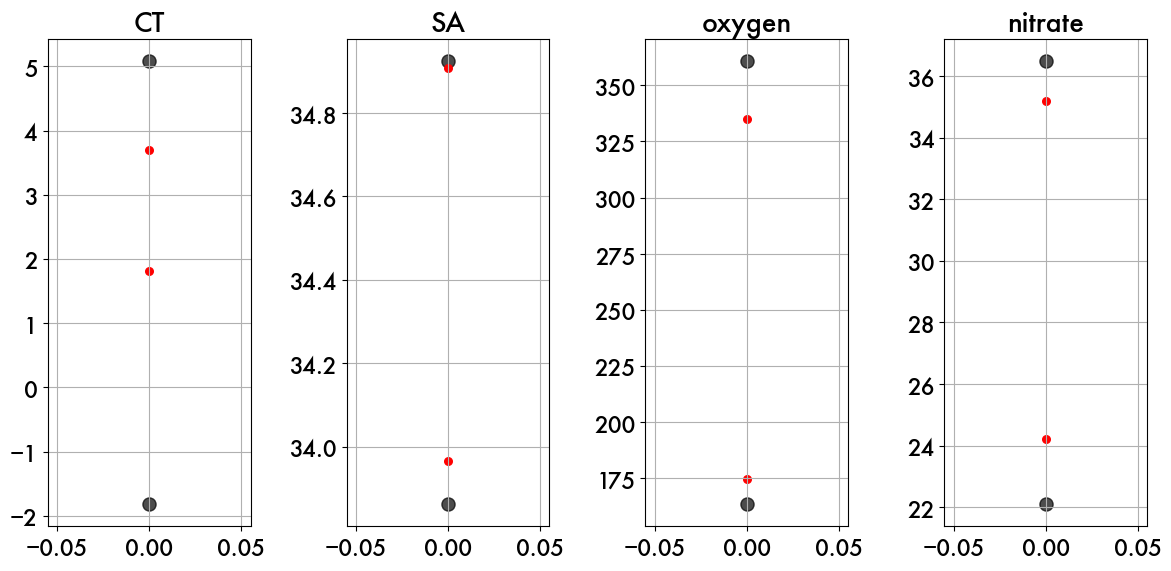

In [ ]:
fig, axs = plt.subplots(1,4, figsize=(12,6), layout='tight')   
axs = axs.flatten()

others = floatDF[floatDF.wmoid!=5906030]
for i, var in enumerate(['CT' , 'SA', 'oxygen', 'nitrate']):
    minval = others[var].min()
    maxval = others[var].max()
    axs[i].scatter([0,0], [minval, maxval], c='k', alpha=0.7, s=90, label='others')
    axs[i].scatter([0,0], [sgfloat[var].min(), sgfloat[var].max()], c='r', s=30, label='sogos')
    # axs[i].scatter([0,0], [df_659[var].min(), df_659[var].max()], c='c', s=30, label='sg660')
    axs[i].set_title(var)
    axs[i].grid()


# After choosing, QC

In [ ]:
# Add last variables and set up final training data

# Add seasonal variable
def add_yd_sinusoids(DF):
    DF['ydcos'] = [sg.get_ydsines(x)[0] for x in DF.yearday.values]
    DF['ydsin'] = [sg.get_ydsines(x)[1] for x in DF.yearday.values]
    return DF

floatDF = add_yd_sinusoids(floatDF)
shipDF = add_yd_sinusoids(shipDF)

# Altimetry

Global Ocean Gridded L 4 Sea Surface Heights And Derived Variables Reprocessed 1993 Ongoing:

- https://data.marine.copernicus.eu/product/SEALEVEL_GLO_PHY_L4_MY_008_047/download

- https://doi.org/10.48670/moi-00148


In [4]:
# Use correct delayed-time product (in Analysis_MLV)
# altimetry = xr.open_dataset('../data/satellite/cmems_obs-sl_glo_phy-ssh_my_allsat-l4-duacs-0.25deg_P1D_1714604183615.nc')
# altimetry['eke'] = np.sqrt(altimetry.ugosa**2 + altimetry.vgosa**2) /2 
# datestart='2019-04-30'
# dateend='2019-07-25'
# dateend='2021-07-25'
# lat1=-56.8; lat2=-43
# lon1=19; lon2=41
# data_sat = altimetry.sel(time=slice(datestart, dateend))
# data_sat = data_sat.sel(latitude=slice(lat1, lat2))
# data_sat = data_sat.sel(longitude=slice(lon1, lon2))
# avg_altimetry = data_sat.mean(dim='time')

# dav_659['eke'] = dfproc.get_track_eke(dav_659, data_sat, daily=True)
# dav_660['eke']= dfproc.get_track_eke(dav_660, data_sat, daily=True)
# dav_float['eke'] = dfproc.get_track_eke(dav_float, data_sat, daily=True)
# dav_659['eke_avg'] = dfproc.get_track_eke(dav_659, data_sat, daily=False)
# dav_660['eke_avg']= dfproc.get_track_eke(dav_660, data_sat, daily=False)
# dav_float['eke_avg'] = dfproc.get_track_eke(dav_float, data_sat, daily=False)

In [ ]:
# Use correct delayed-time product
# Use AVISO satellite data to see study bounds. 
from mod_main import altimetry

# Download fronts of the Antarctic Circumpolar Current
PF = pd.read_csv('../data/ACC_fronts/PF.csv', header=None)
SIF = pd.read_csv('../data/ACC_fronts/SIF.csv', header=None)
for csv in [PF, SIF]:
    csv.columns = ['lon', 'lat']

# EKE CALCULATION

In [ ]:
datestart='2019-04-30'
dateend='2019-07-25'
dateend='2021-07-25'
lat1=-56.8; lat2=-43
lon1=19; lon2=41
data_sat = altimetry.sel(time=slice(datestart, dateend))
data_sat = data_sat.sel(latitude=slice(lat1, lat2))
data_sat = data_sat.sel(longitude=slice(lon1, lon2))


dav_659['eke'] = dfproc.get_track_eke(dav_659, data_sat, daily=True)
dav_660['eke']= dfproc.get_track_eke(dav_660, data_sat, daily=True)
dav_float['eke'] = dfproc.get_track_eke(dav_660, data_sat, daily=True)

dav_659['eke_avg'] = dfproc.get_track_eke(dav_659, data_sat, daily=False)
dav_660['eke_avg']= dfproc.get_track_eke(dav_660, data_sat, daily=False)
dav_float['eke_avg'] = dfproc.get_track_eke(dav_float, data_sat, daily=False)




In [ ]:
# Plot daily-averaged EKE
# ==
fig = plt.figure(figsize=(8,4), layout='constrained')
ax = plt.gca()
ax.plot(dav_659.yearday, dav_659.eke, color=plat_colors['sg659'], label='sg659')
ax.plot(dav_660.yearday, dav_660.eke, color=plat_colors['sg660'], label='sg660')

# Plot deployment-averaged EKE
fig = plt.figure(figsize=(8,4), layout='constrained')
ax = plt.gca()
ax.plot(dav_659.yearday, dav_659.eke_avg, color=plat_colors['sg659'], label='sg659')
ax.plot(dav_660.yearday, dav_660.eke_avg, color=plat_colors['sg660'], label='sg660')

# PAR

In [3]:
# import pyproj
# # need to find MODIS tile number to download

# CELLS = 2400
# VERTICAL_TILES = 18
# HORIZONTAL_TILES = 36
# EARTH_RADIUS = 6371007.181
# EARTH_WIDTH = 2 * math.pi * EARTH_RADIUS

# TILE_WIDTH = EARTH_WIDTH / HORIZONTAL_TILES
# TILE_HEIGHT = TILE_WIDTH
# CELL_SIZE = TILE_WIDTH / CELLS

# MODIS_GRID = pyproj.Proj(f'+proj=sinu +R={EARTH_RADIUS} +nadgrids=@null +wktext')

# def lat_lon_to_modis(lat, lon):
#     x, y = MODIS_GRID(lon, lat)
#     h = (EARTH_WIDTH * .5 + x) / TILE_WIDTH
#     v = -(EARTH_WIDTH * .25 + y - (VERTICAL_TILES - 0) * TILE_HEIGHT) / TILE_HEIGHT
#     return int(h), int(v)

# lat1=-54.7; lat2=-49.2
# lon1=29.5; lon2=39.4

# [htile1, vtile1] = lat_lon_to_modis(lat1, lon1)
# [htile2, vtile2] = lat_lon_to_modis(lat2, lon2)



# FLOAT MLD

In [ ]:
lat1=-54.7; lat2=-49.2
lon1=29.5; lon2=39.4

[htile1, vtile1] = lat_lon_to_modis(lat1, lon1)
[htile2, vtile2] = lat_lon_to_modis(lat2, lon2)



(19, 14)

In [ ]:
print (htile2)
print ()

In [ ]:
# Version of feb 2024
# Use non QC float data to calculate MLD before using nitrate data from filtered floatDF
noQC_float = pd.read_csv('../working-vars/go-bgc/complete_sgfloat_noQC.csv', index_col=0)
mld_float, blank = dfproc.make_diveav(noQC_float, thresh=0.025, mld_lim=[5,15])
mld_float
# mld_float.to_csv('../working-vars/go-bgc/complete_dav_sgfloat.csv')

In [ ]:
dav_6030 = pd.read_csv('../data/bgc-argo/dav_full6030_noqc.csv') 
# Add PAR
dav_6030['par'] = np.tile(np.nan, dav_6030.shape[0])
dav_6030 = dav_6030.apply(get_closest_par, axis='columns')
dav_6030.profid = dav_6030.profid.astype(int)


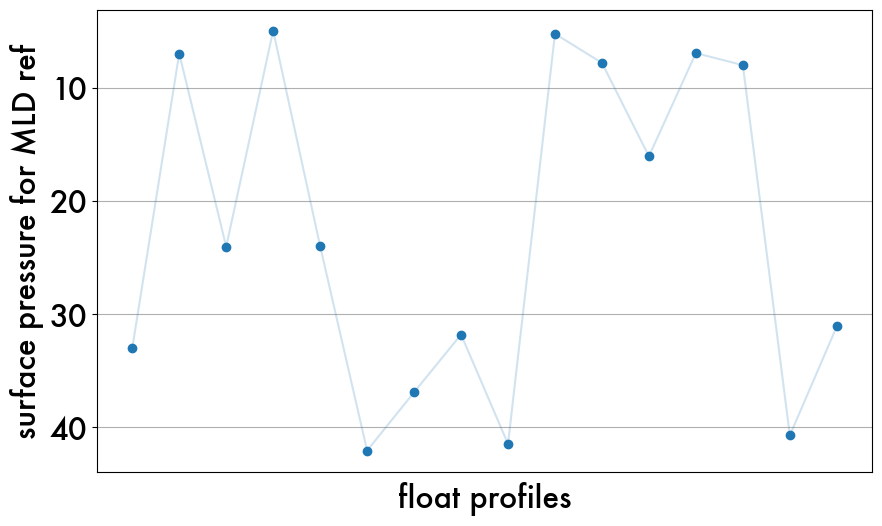

In [ ]:
# Reference fig for surface float pressures
list=[]
for prof in sg.list_profile_DFs(mldf_float):
    list.append(prof.pressure.min())

f = plt.figure(figsize=(10,6))
ax  = plt.gca()
ax.scatter(np.arange(0,len(list),1), list)
ax.plot(np.arange(0,len(list),1), list, alpha=0.2)
ax.set_xlabel('float profiles')
ax.set_ylabel('surface pressure for MLD ref')
ax.invert_yaxis()
ax.set_xticks([])
ax.grid(zorder=1)

# GLIDER Additional Variables

In [ ]:
df_659['AOU'] = df_659['o2sat'] - df_659['oxygen']
df_660['AOU'] = df_660['o2sat'] - df_660['oxygen']

df_660['o2persat'] = 1 + ((df_660['oxygen'] - df_660['o2sat'])/df_660['o2sat'])
df_659['o2persat'] = 1+ ((df_659['oxygen'] - df_659['o2sat'])/df_659['o2sat'])


In [ ]:
# No longer using: originally from Random_Forest_Model
def add_nitrate_grad(platDF, test_pred= False):
    """
    Specifically for getting nitrate gradient of the test prediction from each model. 
    Calculate nitrate gradient dNO3/dZ using derivative of Pchip interpolator 
    @param      platDF: dataframe with argo or glider profiles 
    @return     list of dataframes, each dataframe is a profile with a dN/dZ column added    
    """
    new_DF = pd.DataFrame()

    # profids = pd.unique(platDF.profid) # list of profile ids
    # profile_DFs = []
    # for i in range(len(profids)):
    #     profile_DFs.append(platDF[platDF['profid'] == profids[i]].copy())

    profile_DFs = sg.list_profile_DFs(platDF)

    if test_pred:
        tag = 'test_prediction'
    else:
        tag = 'nitrate'

    for profile in profile_DFs:

        if np.isnan(profile[tag]).all():
            nans = np.empty(len(profile['pressure'])); nans[:] = np.NaN
            profile.loc[:, 'grad_nitrate'] = nans
        else:
            f = scipy.interpolate.PchipInterpolator(x=profile.pressure.values, y=profile[tag].values, extrapolate = False)
            devf = f.derivative()
            grad_nitrate = devf(profile["pressure"].values)
            # 
            
            profile.loc[:, 'grad_nitrate'] = grad_nitrate
        
        # Take vert N2 and find the maximum in the profile. 
        
        new_DF = pd.concat([new_DF, profile])

    return new_DF

Fixed something where log of bbp470 taken too early. 

In [ ]:
dfn_659 = add_nitrate_grad(df_659, test_pred=False)
dfn_660 = add_nitrate_grad(df_660, test_pred=False)

# Upper Ocean Dataframes, which is just upper 200m. 

In [ ]:
uppero_659 = df_659[df_659.pressure<200]
uppero_660 = df_660[df_660.pressure<200]

In [ ]:
def integrate_var(profML, depth=200, variable='nitrate'):

    profML = profML.sort_values(by='pressure')
    new_row = profML.iloc[0, :].copy()
    new_row['pressure'] = 0
    profML = pd.concat([profML, new_row.to_frame().T])

    # Make variable array to integrate
    arr = profML[variable].values
    if variable=='bbp470':
        arr = np.log(profML[variable])

    profML = profML.sort_values(by='pressure')
    if profML.pressure.iloc[-1] > (depth-20): # make sure we have enough depth
        pres_arr = profML.sort_values(by='pressure').pressure.copy()
        pres_arr = pres_arr*10000 # convert to Pa 

        # Integrate variable over ML using trap rule
        # This uses the hydrostatic relation to calculate integral
        # HERE, NORMALIZE BY THE DEPTH HORIZON

        total = np.trapz(arr, pres_arr)/9.8  # in umol/m2 
        # divide by depth horizon
        avg = total/(profML.pressure.iloc[-1])  # in umol/m2/m 
        avg = avg/1000  # in umol/kg
    else:
        total = np.nan
        avg = np.nan   

    # & profML.pressure.iloc[-1] > (depth-20)


    return total, avg

In [ ]:
def add_depth_integrated(df_glid, dav_glid, depth=200, variable='nitrate'):
    upperstat = dav_glid.copy()

    total_name = variable + '_total'
    mean_name = variable + '_mean'

    upperstat[total_name] = np.tile(np.nan, upperstat.shape[0])
    upperstat[mean_name] = np.tile(np.nan, upperstat.shape[0])

    for i, profnum in enumerate(dav_glid.profid.values):
        profML = df_glid[df_glid.profid == profnum].copy()
        
        if len(profML)>0:
            arr = profML[variable]
            upperstat.loc[i,total_name] = integrate_var(profML, variable=variable)[0]
            upperstat.loc[i,mean_name] = integrate_var(profML, variable=variable)[1]

    return upperstat
        

In [ ]:
# test out 
dav_glid = dav_660
variable = 'nitrate'
depth=200

upperstat = dav_glid.copy()

total_name = variable + '_total'
mean_name = variable + '_mean'

upperstat[total_name] = np.tile(np.nan, upperstat.shape[0])
upperstat[mean_name] = np.tile(np.nan, upperstat.shape[0])




In [ ]:
# test out 
profML = sg.list_profile_DFs(uppero_659)[3]
profML = profML.sort_values(by='pressure')

# Make first row 0 pressure
new_row = profML.iloc[0, :].copy()
new_row['pressure'] = 0
profML = pd.concat([profML, new_row.to_frame().T])

# Make variable array to integrate
arr = profML[variable].values
if variable=='bbp470':
    arr = np.log(profML[variable])

pres_arr = profML.sort_values(by='pressure').pressure.copy()
pres_arr = pres_arr*10000 # convert to Pa 

# Integrate variable over ML using trap rule
# This uses the hydrostatic relation to calculate integral
# HERE, NORMALIZE BY THE DEPTH HORIZON

profML = profML.sort_values(by='pressure')
total = np.trapz(arr, pres_arr)/9.8  # in umol/m2 
# divide by depth horizon
avg = total/(profML.pressure.iloc[-1])  # in umol/m2/m 
avg = avg/1000  # in umol/kg


In [ ]:
upperstat_659 = add_depth_integrated(uppero_659, dav_659, depth=200, variable='nitrate')
upperstat_660 = add_depth_integrated(uppero_660, dav_660, depth=200, variable='nitrate')

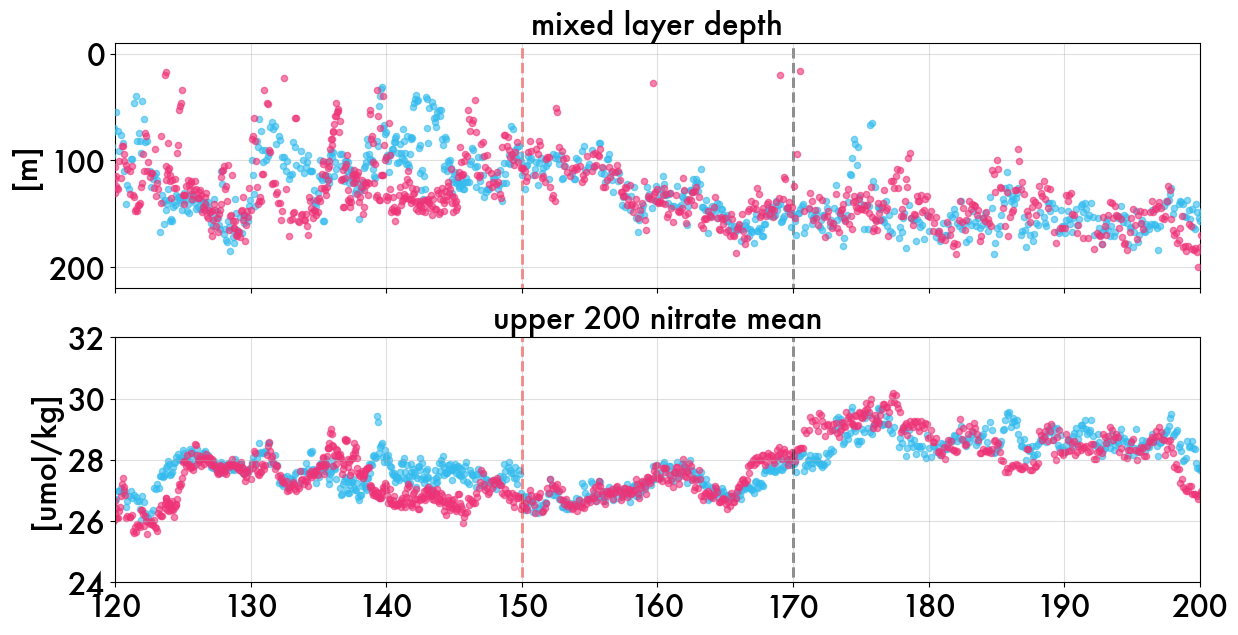

In [ ]:
# UPPER OCEAN NITRATE
fig, axs = plt.subplots(2,1,figsize=(14,7), sharex=True) # 14,12
axs = axs.flatten()


axs[0].scatter(upperstat_659.yearday, upperstat_659.mld, label='sg659', s=20, alpha=0.6, color=glid_colors['sg659'], zorder=3)
axs[0].scatter(upperstat_660.yearday, upperstat_660.mld, label='sg660', s=20, alpha=0.6, color=glid_colors['sg660'], zorder=3)
axs[0].set_ylabel('[m]')
axs[0].invert_yaxis()
axs[0].set_ylim([220, -10])

axs[1].scatter(upperstat_659.yearday, upperstat_659.nitrate_mean, label='sg659', s=20, alpha=0.6, color=glid_colors['sg659'])
axs[1].scatter(upperstat_660.yearday, upperstat_660.nitrate_mean, label='sg660', s=20, alpha=0.6, color=glid_colors['sg660'])
axs[1].set_ylabel('[umol/kg]')
axs[1].set_ylim([24,32])


# axs[2].scatter(hvariance_659.yearday, hvariance_659.nitrate_mean, label='sg659', s=30, alpha=0.8, color=glid_colors['sg659'])
# axs[2].set_ylabel('[umol2/kg2]')
# axs[2].scatter(hvariance_660.yearday, hvariance_660.nitrate_mean, label='sg660', s=30, alpha=0.8, color=glid_colors['sg660'])
# axs[2].set_ylim([-.05, 0.49])

# axs[3].scatter(upperstat_float.yearday, upperstat_float.nitrate_cross, label='float',  marker='D', edgecolors='k', linewidth=2,
#                s=70, alpha=0.8, color='#CCBB44')
# axs[3].scatter(upperstat_659.yearday, upperstat_659.nitrate_cross, label='sg659', s=20, alpha=0.6, color=glid_colors['sg659'])
# axs[3].scatter(upperstat_660.yearday, upperstat_660.nitrate_cross, label='sg660', s=20, alpha=0.6, color=glid_colors['sg660'])
# axs[3].hlines(0, 150, 200, linestyle='--', linewidth=3, color='k', alpha=0.5)
# axs[3].set_ylabel('[umol/kg]')
# axs[3].set_ylim([-9, 1])

# Comment out titles
axs[0].set_title(('mixed layer depth'), fontsize=22)
axs[1].set_title('upper 200 nitrate mean', fontsize=22)
# axs[2].set_title('ML nitrate variance', fontsize=22)
# axs[3].set_title('nitrate difference across ML', fontsize=22)


for ax in axs:
    ax.grid(zorder=0, alpha=0.4)
    ax.set_xlim([120,200])
    # ax.legend()
    ax.vlines(150, -20,250, color='r', linewidth=2, alpha=0.5, linestyle='dashed', zorder=1)
    ax.vlines(170, -20,250, color='k', linewidth=2, alpha=0.5, linestyle='dashed', zorder=1)


# GLIDER MLD

In [ ]:
# 3 GLIDER MLD
sg659 = pd.read_csv('../data/glider/df_659_tsO2corr_nonandrop_0131.csv')
sg660 = pd.read_csv('../data/glider/df_660_tsO2corr_nonandrop_0131.csv')

dav_659, nanmld_659 = dfproc.make_diveav(sg659[sg659.yearday>0], thresh=0.005, mld_lim=[8,12]); print() 
dav_660, nanmld_660 = dfproc.make_diveav(sg660[sg660.yearday>0], thresh=0.005, mld_lim=[8,12])



In [ ]:
# #Troubleshooting 
# dav_plat = dav_float
# mldf_plat = mldf_float
# variable='nitrate'

# mlstats = dav_plat.copy()

# total_name = variable + '_total'
# # variance_name = variable + '_variance'
# mean_name = variable + '_mean'

# mlstats[total_name] = np.tile(np.nan, mlstats.shape[0])
# mlstats[mean_name] = np.tile(np.nan, mlstats.shape[0])
# # mlstats[variance_name] = np.tile(np.nan, mlstats.shape[0])

# mlstats= mlstats.reset_index(drop=True)

# for i, profML in enumerate(sg.list_profile_DFs(mldf_plat)):

#     if len(profML)>0:  # if no ML data, then nans are kept as is.
#         # if there are ML data, add stats to dav_plat
#         # Need to use integral function

#         # For variance, make sure you take log of bbp values before
#         # For total and mean you do this in the intergrate_ML method 
#         arr = profML[variable]
#         if variable == 'bbp470':
#             arr = np.log(profML[variable])

#         mlstats.loc[i,total_name] = dfproc.integrate_ML_var(profML, variable=variable)[0]

#         # move this for horizontal variance
#         # mlstats.loc[i,variance_name] = np.var(arr)  # change to nitrate

#         mlstats.loc[i,mean_name] = dfproc.integrate_ML_var(profML, variable=variable)[1]

In [ ]:
rerun = True
desc='full'
if rerun:
    model_list = ['Model_A', 'Model_B', 'Model_C', 'Model_D', 'Model_E', 'Model_F', 'Model_G']

    # Initialize object again
    cv_kfold = crf.CrossVal_KFold(model_list)

    for mdl in model_list: 
        df = pd.read_csv('../working-vars/RF-crossval/kfold_valDF_' + mdl + '_' + desc + '.csv')
        crossfold_MAEs = pd.read_csv('../working-vars/RF-crossval/kfold_list_MAEs_' + desc + '.csv')

        # Here's where we use the imported data 
        cv_kfold.val_DF[mdl] = df.copy()

        # Later, we will use the cv_kfold.val_error['Mdl_G'] to plot the histogram of full errors
        cv_kfold.val_error[mdl] = cv_kfold.val_DF[mdl]['val_error'] #allfold_val_df['val_error'] 
        cv_kfold.val_relative_error[mdl] = cv_kfold.val_DF[mdl]['val_relative_error']

        # We use the next imported data, MAE lists across models, 
        cv_kfold.MAEs[mdl] = crossfold_MAEs[mdl] # this is a list of 10 MAEs
                                                # mean of this is the final validation error for Model_X
        cv_kfold.IQRs[mdl] = crossfold_MAEs[mdl]


## Glider DAV Troubleshooting

(0.1, 0.7)

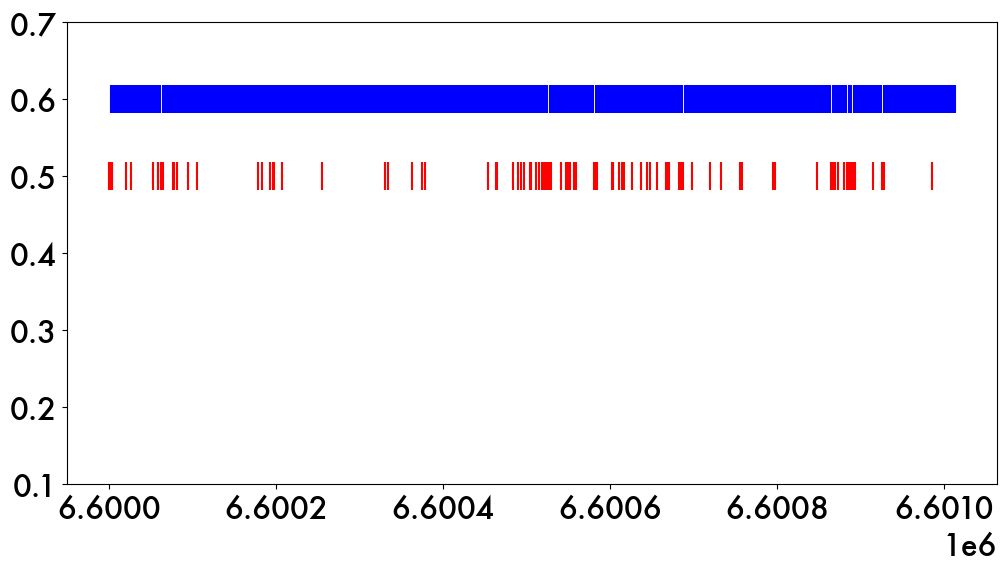

In [ ]:
# Visualize which profiles have no mld
fig = plt.figure(figsize=(12,6))

# plt.scatter(nanmld_659, np.tile(.2, len(nanmld_659)), s=400, c='r', marker='|')
# other = [x for x in dav_659.profid.unique() if x not in nanmld_659]
# plt.scatter(other, np.tile(.3, len(other)), s=400, c='b', marker='|')

plt.scatter(nanmld_660, np.tile(.5, len(nanmld_660)), s=400, c='r', marker='|')
other = [x for x in dav_660.profid.unique() if x not in nanmld_660]
plt.scatter(other, np.tile(.6, len(other)), s=400, c='b', marker='|')

plt.ylim([0.1,.7])


In [ ]:
# copied from dfproc for checking method: 

# def integrate_ML_var(profML, 'nitrate'='nitrate'):
# """ 
# @param  profML = dataframe of only ML values from single profile"""

# To avoid too much extrapolation, we set the surface value to the first value in the ML
# Also set the base ML value to the closest (deepest ML value)
# pnum = 6600688 # example profile
# profML = mldf_660[mldf_660.profid==pnum]

profML = sg.list_profile_DFs(mldf_float)[15]

new_row = profML.sort_values(by='pressure').iloc[0, :].copy()
new_row['pressure'] = 0
profML = pd.concat([profML, new_row.to_frame().T])

end_row = profML.sort_values(by='pressure').iloc[-1, :].copy()
end_row['pressure'] = profML.mld.iloc[0]
profML = pd.concat([profML, end_row.to_frame().T])

# Make 'nitrate' array to integrate
arr = profML['nitrate']
# if variable=='bbp470':
#     arr = np.log(profML[variable])

pres_arr = profML.pressure.copy()
pres_arr = pres_arr*10000 # convert from dbar to Pa SI units

# Integrate nitrate over ML using trap rule
# This uses the hydrostatic relation to calculate integral
total = np.trapz(arr, pres_arr)/9.8  # in umol/m2 
avg = total/profML.mld.iloc[0]  # in umol/m2/m 
avg = avg/1000  # in umol/kg




In [ ]:
# look at 1 profile
pnum=6600688
prof = sg660[sg660.profid==pnum]
# prof =sg660[sg660.profid==6600000]
mld_lim=[8,12]
prof = prof.sort_values(by='pressure')
temp10 = prof[(prof.pressure>mld_lim[0]) & (prof.pressure<mld_lim[1])]

thresh=0.005

if len(temp10)>0:
    dens10m = np.nanmean(temp10.sigma0.values)
    dens_tofind = dens10m + 0.05 # threshold used in dove 2021

    rangesig = pd.DataFrame()
    rangesig = prof[(prof.sigma0 < (dens_tofind + thresh)) & (prof.sigma0 > (dens_tofind-thresh))].copy()
    # lenrangesig.append(len(rangesig))
    pres = np.nanmean(rangesig.pressure)

/var/folders/nt/sjynqxjj7cz9r15fkd5d4r_40000gn/T/ipykernel_42583/2923017009.py:18: RuntimeWarning: Mean of empty slice
  pres = np.nanmean(rangesig.pressure)


/opt/homebrew/Caskroom/mambaforge/base/envs/mlsogos/lib/python3.8/site-packages/matplotlib/axes/_base.py:2539: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


(27.0, 27.6)

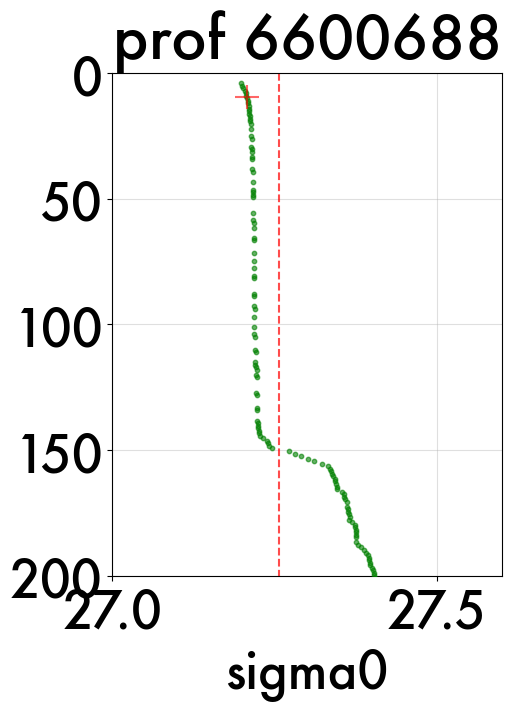

In [ ]:
# check one profile 
# pnum = 6600684
dat = df_660[df_660.profid==pnum]
# dat = dav_660

fig = plt.figure(figsize=(6,8), tight_layout=True)
ax = plt.gca()
ax.scatter(dat.sigma0, dat.pressure, s=10, c='g', alpha=0.6, zorder=3)
ax.scatter(dens10m, np.nanmean(temp10.pressure.values), s=300, marker='+', c='r', alpha=0.6, zorder=3)
# ax.scatter(avg, profML.mld.iloc[0], s=700, marker='+', c='r', alpha=0.6, zorder=3)


ax.invert_yaxis()
ax.hlines(mlstat_660[mlstat_660.profid==pnum].mld, 24,35)

ax.set_ylim([200,0])
ax.set_title('prof ' + str(pnum))
ax.set_xlabel('sigma0')
ax.grid(zorder=1, alpha=0.4)


#mld calculated
ax.hlines(pres, 26,32, linestyle='dashed', alpha=0.7)
# ax.hlines(mlstat_660[mlstat_660.profid==pnum].mld, 26,32, linestyle='dashed', alpha=0.7)

ax.vlines(dens_tofind, 0, 200, color='r', linestyle='dashed', alpha=0.7)
ax.set_xlim([27, 27.6])


(27.0, 27.45)

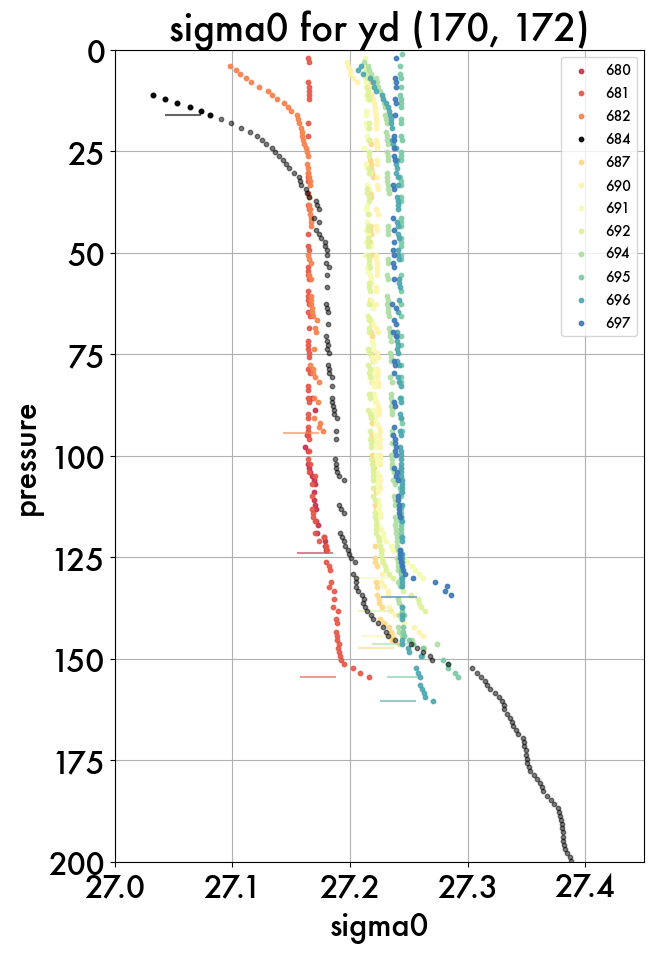

In [ ]:
dat = mldf_660
dat = dat[(dat.yearday>170) & (dat.yearday<172)]

fig = plt.figure(figsize=(7,10), tight_layout=True)
ax = plt.gca()

# pal = sns.color_palette('Reds', 20)
pal = sns.color_palette('Spectral', len(dat.profid.unique()))
pal[3] = 'k'
for ind, prof in enumerate(dat.profid.unique()):
    ax.scatter(dat[dat.profid==prof].sigma0, dat[dat.profid==prof].pressure, s=10, alpha=0.9, zorder=3, color=pal[ind],
               label=str(prof)[-3:])
    ax.scatter(dat[dat.profid==prof].sigma0.mean(), mlstat_660[mlstat_660.profid==prof].mld, 
               s=700, marker='_', alpha=0.6, zorder=3, color=pal[ind])

ax.scatter(df_660[df_660.profid==6600684].sigma0, df_660[df_660.profid==6600684].pressure, s=10, zorder=3, color='k', alpha=0.5)


ax.invert_yaxis()
ax.set_ylim([200,0])
ax.grid(zorder=1)
ax.set_xlabel('sigma0')
ax.set_ylabel('pressure')
ax.legend(fontsize=10)

ax.set_title('sigma0 for yd (170, 172)')
# ax.hlines(mlstat_float.iloc[7].mld, 24,35)

# ax.set_xlim([33.75, 34.5]) # for salinity
ax.set_xlim([27., 27.45]) # for sigma0


Text(0.5, 1.0, 'ML nitrate for yds 170 to 172')

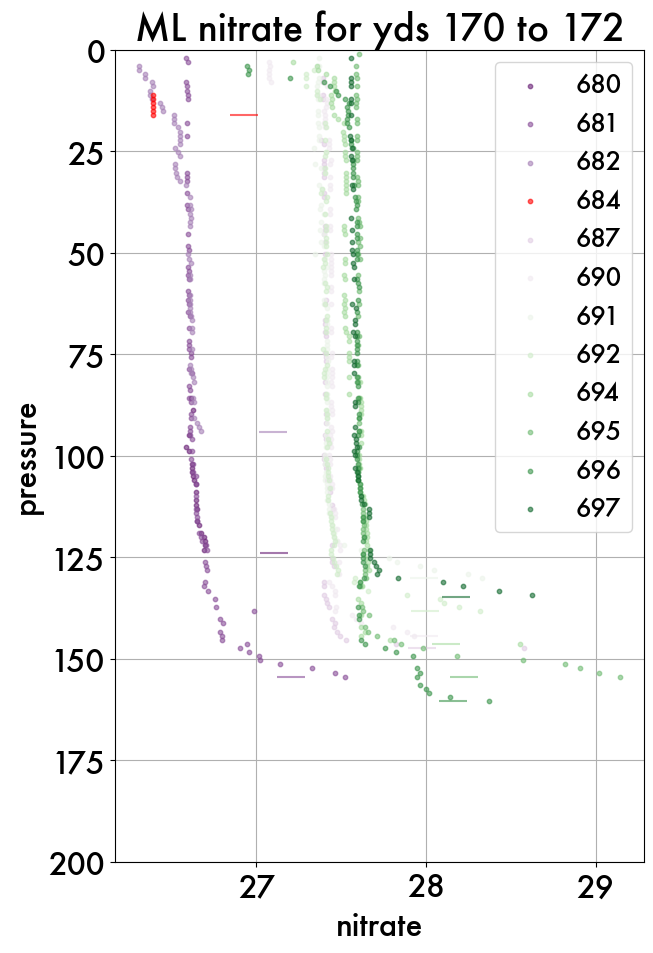

In [ ]:
# Plot nitrate profiles overlaid from gliders between two yeardays
dat = mldf_660
yd1 = 170
yd2 = 172
dat = dat[(dat.yearday>yd1) & (dat.yearday<yd2)]

fig = plt.figure(figsize=(7,10), tight_layout=True)
ax = plt.gca()

pal = sns.color_palette('PRGn', len(dat.profid.unique()))
pal[3] = 'r'
for ind, prof in enumerate(dat.profid.unique()):
    ax.scatter(dat[dat.profid==prof].nitrate, dat[dat.profid==prof].pressure, s=10, alpha=0.6, zorder=3, color=pal[ind],
               label=str(prof)[-3:])
    
    ax.scatter(mlstat_660[mlstat_660.profid==prof].nitrate_mean, mlstat_660[mlstat_660.profid==prof].mld, 
               s=400, marker='_', alpha=0.6, zorder=3, color=pal[ind])
ax.invert_yaxis()
ax.set_ylim([200,0])
ax.grid(zorder=1)
ax.set_xlabel('nitrate')
ax.set_ylabel('pressure')
ax.legend()

ax.set_title('ML nitrate for yds ' + str(yd1) + ' to ' + str(yd2))

# Troubleshoot Glider ML stats (and Bx)

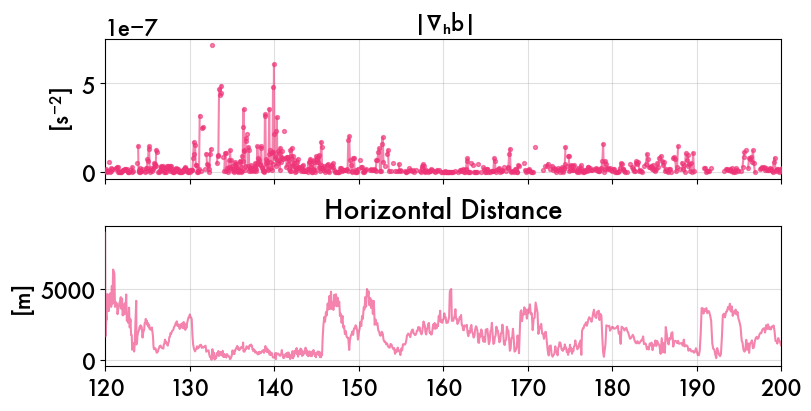

In [ ]:
# Checking plot using good version of MLV method.
# bx_659 = mlv.get_ml_bx(df_659, dav_659, rho_ref = np.nanmean(df_659.sigma0) + 1000)
# bx_660 = mlv.get_ml_bx(df_660, dav_660, rho_ref = np.nanmean(df_660.sigma0) + 1000)

fig, axs = plt.subplots(2,1, figsize=(8,4), sharex=True, layout='constrained') # 14,12
axs = axs.flatten()
dotsize=8

ind = 0
for ax in axs[ind:ind+1]:
    # ax.scatter(bx_659.yearday, np.abs(bx_659.bx), label='sg659', s=dotsize, alpha=0.6, color=plat_colors['sg659'], zorder=3)
    ax.scatter(bx_660.yearday, np.abs(bx_660.bx), label='sg660', s=dotsize, alpha=0.6, color=plat_colors['sg660'], zorder=3)
    ax.plot(bx_660.yearday, np.abs(bx_660.bx), label='sg660', alpha=0.6, color=plat_colors['sg660'], zorder=3)
    ax.set_ylabel(hb_unit) 
    ax.set_title(hb_title, fontsize=titlesize) # @ (at 100m)
    # ax.set_ylim([0, 1e-06])
    # ax.set_yscale('log')
    # ax.legend(fontsize=10)

ind = ind+1
for ax in axs[ind:ind+1]:
    # ax.scatter(bx_659.yearday, np.abs(bx_659.bx), label='glider 659', s=dotsize, alpha=0.6, color=plat_colors['sg659'], zorder=3)
    ax.plot(dav_660.yearday, np.abs(dav_660.xdist), label='glider 660', alpha=0.6, color=plat_colors['sg660'], zorder=3)
    ax.set_title('Horizontal Distance')
    ax.set_ylabel('[m]')

    # ax.set_ylim([0, 2e-07])


# ind = ind+1
# for ax in axs[ind:ind+1]:
#     # ax.scatter(bx_659.yearday, np.abs(bx_659.b), label='glider 659', s=dotsize, alpha=0.6, color=plat_colors['sg659'], zorder=3)
#     ax.scatter(bx_660.yearday, np.abs(bx_660.b), label='glider 660', s=dotsize, alpha=0.6, color=plat_colors['sg660'], zorder=3)
#     ax.set_title('b', fontsize=titlesize)



# ind = ind+1
# for ax in axs[ind:ind+1]:
#     # ax.scatter(hvariance_659.yearday, hvariance_659.nitrate_mean, label='sg659', s=dotsize+4, alpha=0.6, color=plat_colors['sg659'])
#     ax.set_ylabel(umol_unit_squared) 
#     ax.scatter(hvariance_660.yearday, hvariance_660.nitrate_mean, label='sg660', s=dotsize+4, alpha=0.6, color=plat_colors['sg660'])
#     ax.set_ylim([-.05, 0.47])
#     ax.set_title(hvar_title, fontsize=titlesize)


for ax in axs:
    ax.grid(zorder=0, alpha=0.4)
    ax.set_xlim([120,200])
    # ax.legend()

    # ax.vlines(150, -30,250, color='r', linewidth=1.8, alpha=0.5, linestyle='dashed', zorder=1)
    # ax.vlines(170, -30,250, color='k', linewidth=1.8, alpha=0.5, linestyle='dashed', zorder=1)



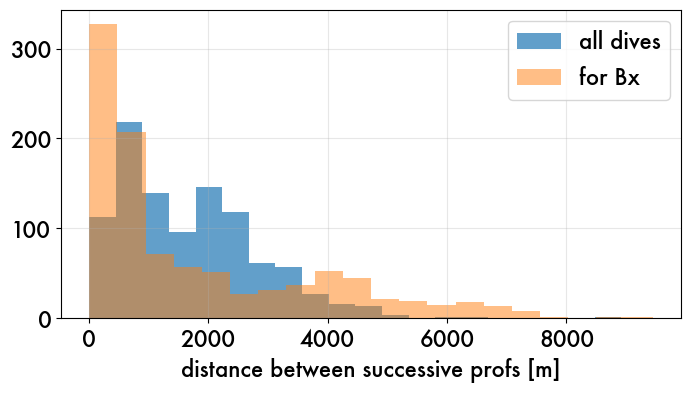

In [ ]:
plt.figure(figsize=(8,4))
plt.hist(dav_660.daily_dist, bins=20, label='all dives', alpha=0.7)
plt.hist(depth_bx.xdist, bins=20, label='for Bx', alpha=0.5)
plt.legend()
plt.xlabel('distance between successive profs [m]')
plt.grid(zorder=0, alpha=0.3)

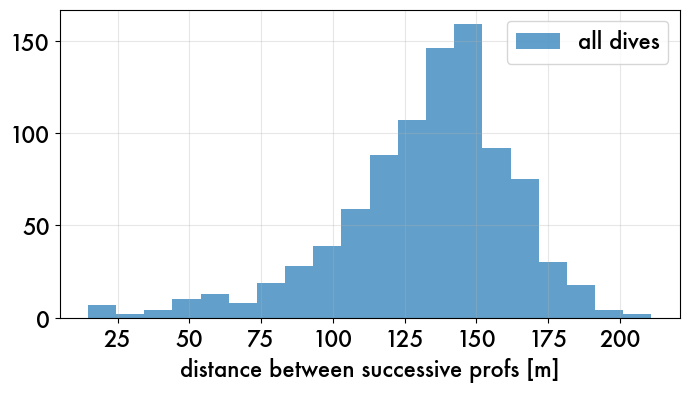

In [ ]:
plt.figure(figsize=(8,4))
plt.hist(dav_660.mld, bins=20, label='all dives', alpha=0.7)
plt.legend()
plt.xlabel('distance between successive profs [m]')
plt.grid(zorder=0, alpha=0.3)

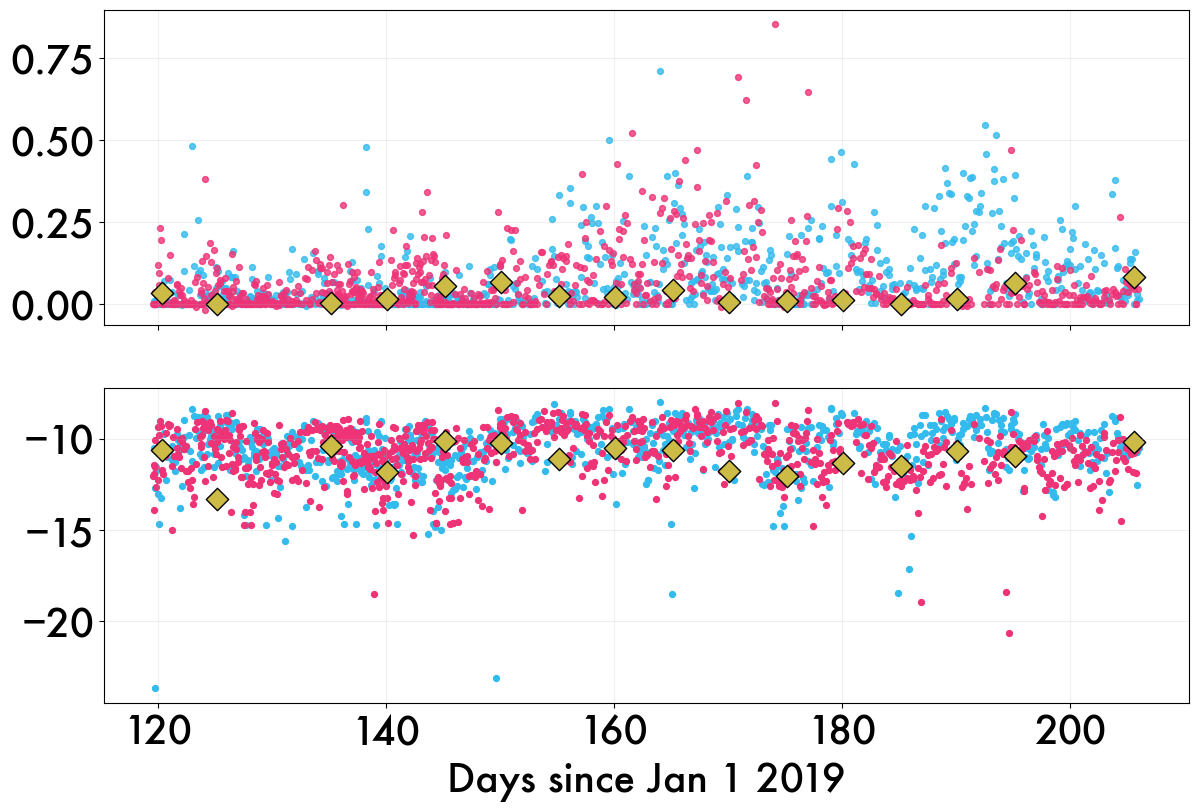

In [ ]:
# fig = plt.figure(figsize=(12,8), layout='tight')
# ax = plt.gca()

fig, axs = plt.subplots(2,1,figsize=(14,9), sharex=True) # 14,12
axs = axs.flatten()


for ax in axs[0:1]:
    ax.scatter(baseML_stat659.yearday, baseML_stat659.grad_nitrate, label='sg659',
                alpha=0.8, s=18, color=plat_colors['sg659'])
    ax.scatter(baseML_stat660.yearday, baseML_stat660.grad_nitrate, label='sg660',
                alpha=0.8, s=18, color=plat_colors['sg660'])
    ax.scatter(baseML_float.yearday, baseML_float.grad_nitrate, label='float',
                alpha=1, s=130, marker='D', color=plat_colors['float'],
                edgecolors='k')
    
    # ax.set_ylabel('dNO3/dz')
    # ax.set_title('Nitrate gradient at base of ML')
    # ax.legend()

for ax in axs[-1:]:
    ax.scatter(baseML_stat659.yearday, baseML_stat659.log_buoyancy, label='sg659', s=18, color=plat_colors['sg659'])
    ax.scatter(baseML_stat660.yearday, baseML_stat660.log_buoyancy, label='sg660', s=18, color=plat_colors['sg660'])
    ax.scatter(baseML_float.yearday, baseML_float.log_buoyancy, label='float', s=130, marker='D', color=plat_colors['float'],
                edgecolors='k')

    # ax.set_title('Buoyancy at base of ML')
    # ax.set_ylabel('log(N2)')
    ax.set_xlabel('Days since Jan 1 2019')

# plt.plot(baseML_stat659.yearday, baseML_stat659.grad_nitrate,
#         alpha=0.2, linewidth=2, color=plat_colors['sg659'])
# plt.plot(baseML_stat660.yearday, baseML_stat660.grad_nitrate,
#         alpha=0.2, linewidth=2, color=plat_colors['sg660'])

# Subsample every 3o profiles
# plt.scatter(baseML_stat659.yearday[::30], baseML_stat659.grad_nitrate[::30], label='sg659',
#             alpha=2, s=50, color='k')
# plt.scatter(baseML_stat660.yearday[::30], baseML_stat660.grad_nitrate[::30], label='sg660',
#             alpha=2, s=50, color='k')


for ax in axs:
    ax.grid(zorder=3, alpha=0.2)



Text(0, 0.5, 'log(N^2)')

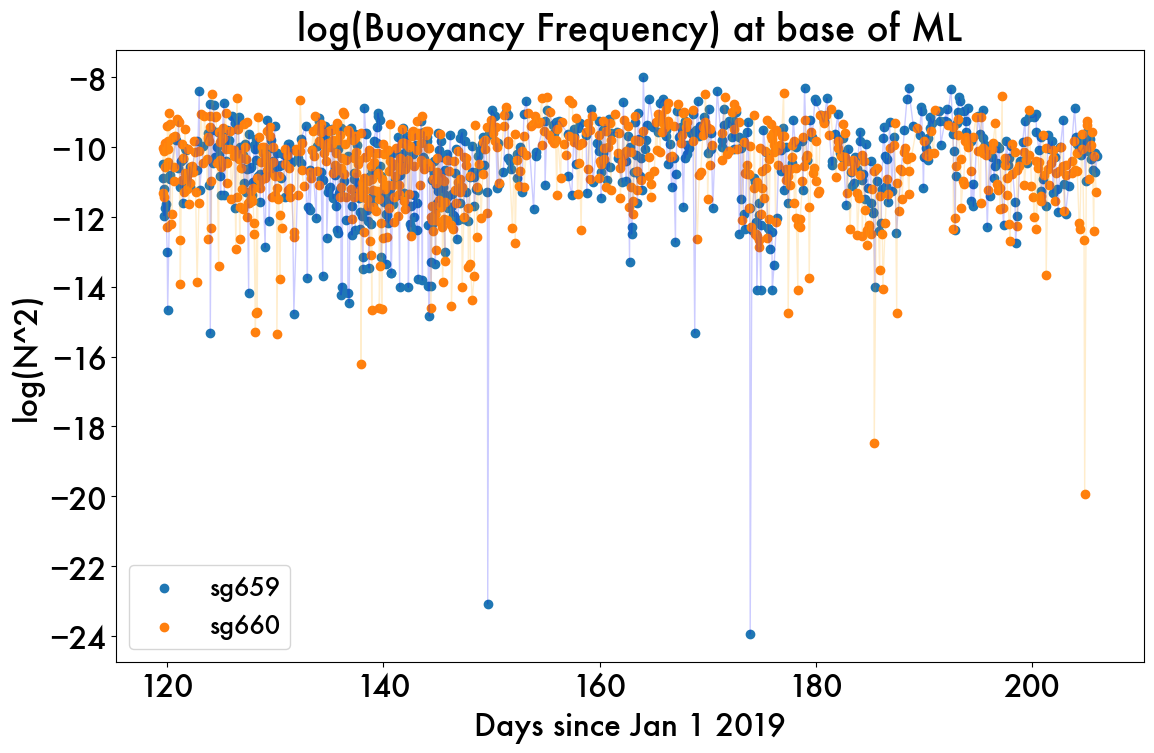

In [ ]:
# fig = ax.figure(figsize=(12,8), layout='tight')
# ax = ax.gca()
ax.scatter(baseML_stat659.yearday, baseML_stat659.log_buoyancy, label='sg659')
ax.plot(baseML_stat659.yearday, baseML_stat659.log_buoyancy,
        alpha=0.2, linewidth=1, color='blue')
ax.scatter(baseML_stat660.yearday, baseML_stat660.log_buoyancy, label='sg660')
ax.plot(baseML_stat660.yearday, baseML_stat660.log_buoyancy,
        alpha=0.2, linewidth=1, color='orange')
ax.legend()
ax.title('log(Buoyancy Frequency) at base of ML')
ax.set_xlabel('Days since Jan 1 2019')
ax.set_ylabel('log(N^2)')

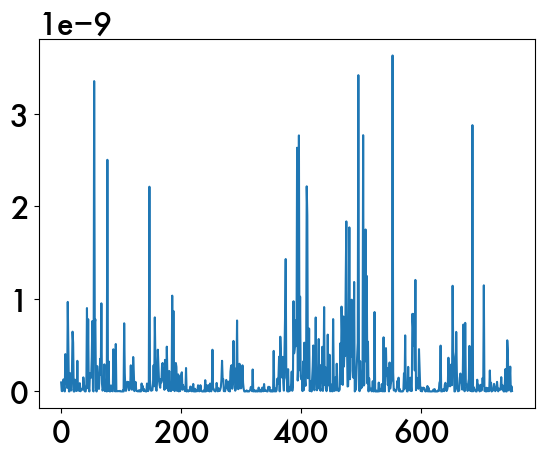

In [ ]:
arr = get_baseML_stat(mldf_660, dav_660, var='log_buoyancy')
plt.plot([10**y for y in arr])

## Glider and Float Subsampling Comparison

In [ ]:
# exploring method
yd_start = 120
spacing = 10 # 10 day separation of sampling
targets = np.arange(yd_start, 215, spacing)

idx_list = [np.abs(mlstat_660['yearday'] - target).idxmin() for target in targets]
subML_660 = mlstat_660.loc[idx_list]
subML_660

,profid,yearday,lat,lon,mld,par,nitrate_total,nitrate_mean,bbp470_total,bbp470_mean,oxygen_total,oxygen_mean,nitrate_cross,nitrate_underML
12,6600013,120.004943,-51.331348,30.354227,130.172000,5.775997,3.226193e+06,24.784077,-1.011176e+06,-7.768002,4.310008e+07,331.100994,-3.339854,28.123931
161,6600164,130.003888,-50.806914,33.105056,147.325667,5.985996,3.973315e+06,26.969606,-1.184344e+06,-8.038956,4.977577e+07,337.862154,-1.558510,28.528116
312,6600315,140.023630,-51.252063,33.002398,132.694500,4.297997,3.399454e+06,25.618649,-1.036482e+06,-7.811039,4.387306e+07,330.632103,-4.332347,29.950996
453,6600456,150.019617,-50.213821,33.380552,107.450500,5.219997,2.708984e+06,25.211458,-8.614296e+05,-8.016990,3.569990e+07,332.245044,-2.131685,27.343143
563,6600566,159.973227,-51.651843,35.653835,127.147333,4.437996,3.334310e+06,26.223985,-1.019170e+06,-8.015661,4.238636e+07,333.364113,-4.028715,30.252700
676,6600680,170.035811,-53.452420,36.314520,134.235111,1.435997,3.640141e+06,27.117653,-1.069845e+06,-7.969933,4.566358e+07,340.176128,-3.387520,30.505173
779,6600785,179.980839,-52.875911,36.987361,152.905750,2.985996,4.289398e+06,28.052560,-1.237718e+06,-8.094648,5.149377e+07,336.768051,-3.699244,31.751804
866,6600874,190.045731,-52.513673,37.118170,162.493000,2.949997,4.504865e+06,27.723440,-1.314823e+06,-8.091569,5.453027e+07,335.585349,-3.768482,31.491922
952,6600962,200.003117,-51.755219,38.401459,181.665000,6.461998,4.845775e+06,26.674236,-1.458183e+06,-8.026769,6.064466e+07,333.826860,-3.766103,30.440339
1003,6601013,205.923437,-51.524732,39.020375,146.830500,5.805996,4.127112e+06,28.108000,-1.177513e+06,-8.019540,4.935299e+07,336.122213,-2.520041,30.628041


In [ ]:
def subsample_glids(mldf, yd_start=120, spacing=5):
    targets = np.arange(yd_start, 205, spacing)
    idx_list = [np.abs(mldf['yearday'] - target).idxmin() for target in targets]
    subML = mldf.loc[idx_list]
    return subML

- Make a dictionary where the keys are a starting date between 120 and 125 (10 folds)
- Make them sample every 5 days, to match that of the float and increase by 4 hours each time. 
- What is the spread of nitrate_mean from all these subdatasets? 

That is, 
If we subsample fewer times do we get reliable ish measurements? Or in some cases do we observe much higher nitrate means ? 


In [ ]:
subsamples_659 = dict.fromkeys([str(x) for x in np.arange(170,175,0.25)])
subsamples_660 = dict.fromkeys([str(x) for x in np.arange(170,175,0.25)])

for x in np.arange(170,175,0.25):
    subsamples_659[str(x)] = subsample_glids(mlstat_659, yd_start=x, spacing=5)
    subsamples_660[str(x)] = subsample_glids(mlstat_660, yd_start=x, spacing=5)

In [ ]:
list = []
for k in subsamples_659.keys():
    dat = subsamples_659[k]
    list.append(dat.nitrate_mean.mean())

print('Subsamples every 6 hours, starting at yearday 170:')
print('mean nitrate above MLD (umol/kg): \t' + str(np.mean(list)))
print('median nitrate above MLD (umol/kg): \t' + str(np.median(list)))
print('std nitrate above MLD (umol/kg): \t' + str(np.std(list)))



Subsamples every 6 hours, starting at yearday 170:
mean nitrate above MLD (umol/kg): 	27.738160534801874
median nitrate above MLD (umol/kg): 	27.698151012674295
std nitrate above MLD (umol/kg): 	0.16666534595053195


Text(0.5, 1.0, 'sg660, example subsampling every 5 days')

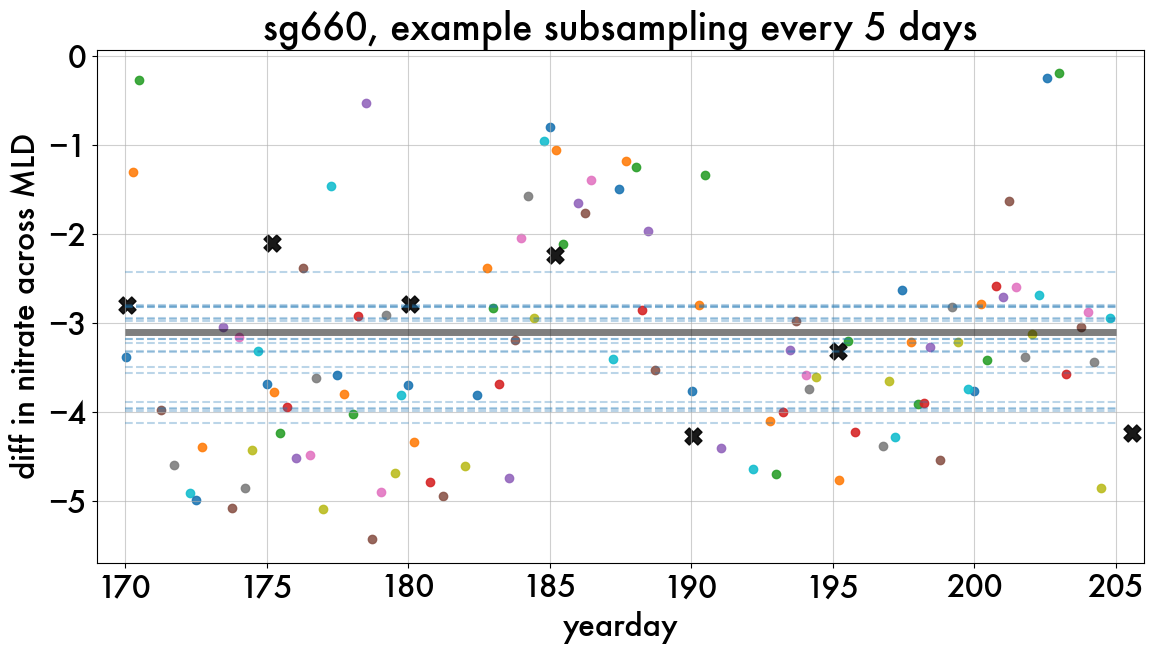

In [ ]:
f = plt.figure(figsize=(12,7), tight_layout=True)
ax = plt.gca()

# for k in ['120.0']: # 
for k in subsamples_660.keys():
    dat = subsamples_660[k]
    ax.scatter(dat.yearday, dat.nitrate_cross, alpha=0.9, label=str(k))

    # ax.hlines(dat[dat.yearday<150].nitrate_cross.mean(), 120, 150, linestyle='--', alpha=0.5)
    ax.hlines(dat[dat.yearday>170].nitrate_cross.mean(), 170, 205, linestyle='--', alpha=0.3)

# ax.scatter(mlstat_660.yearday, mlstat_660.nitrate_cross, alpha=0.1, label='all', marker='.', color='k')
flt = mlstat_float[(mlstat_float.yearday>170)]
ax.scatter(flt.yearday, flt.nitrate_cross, alpha=0.9, s=150, marker='X', label='float', color='k')
ax.hlines(flt.nitrate_cross.mean(), 170, 205, alpha=0.5, linewidth=5, color='k')

ax.set_xlabel('yearday')
ax.set_ylabel('diff in nitrate across MLD')

ax.grid(zorder=1, alpha=0.6)
ax.set_xlim([169,206])
ax.set_title('sg660, example subsampling every 5 days')